In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
csv_file = 'D:/Datasets/2008.csv'

dtype = {'DayOfWeek': np.uint8, 'DayofMonth': np.uint8, 'Month': np.uint8 , 
         'Cancelled': np.uint8, 'Year': np.uint16, 'FlightNum': np.uint16 , 
         'Distance': np.uint16, 'UniqueCarrier': str, 'CancellationCode': str, 
         'Origin': str, 'Dest': str, 'ArrDelay': np.float16, 
         'DepDelay': np.float16, 'CarrierDelay': np.float16, 
         'WeatherDelay': np.float16, 'NASDelay': np.float16, 
         'SecurityDelay': np.float16, 'LateAircraftDelay': np.float16, 
         'DepTime': np.float16}

%time flights_df = pd.read_csv(csv_file, usecols=dtype.keys(), dtype=dtype)

Wall time: 9.57 s


In [6]:
print(flights_df.shape)
print(flights_df.columns)

(7009728, 19)
Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'UniqueCarrier',
       'FlightNum', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance',
       'Cancelled', 'CancellationCode', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


In [7]:
flights_df.head().T

,0,1,2,3,4
Year,2008,2008,2008,2008,2008
Month,1,1,1,1,1
DayofMonth,3,3,3,3,3
DayOfWeek,4,4,4,4,4
DepTime,2003,754,628,926,1829
UniqueCarrier,WN,WN,WN,WN,WN
FlightNum,335,3231,448,1746,3920
ArrDelay,-14,2,14,-6,34
DepDelay,8,19,8,-4,34
Origin,IAD,IAD,IND,IND,IND


In [9]:
flights_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7009728.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
Month,7009728.0,6.375130,3.406737,1.0,3.0,6.0,9.0,12.0
DayofMonth,7009728.0,15.728015,8.797068,1.0,8.0,16.0,23.0,31.0
DayOfWeek,7009728.0,3.924182,1.988259,1.0,2.0,4.0,6.0,7.0
DepTime,6873482.0,NaN,NaN,1.0,928.0,1325.0,1728.0,2400.0
FlightNum,7009728.0,2224.200105,1961.715999,1.0,622.0,1571.0,3518.0,9743.0
ArrDelay,6855029.0,NaN,NaN,-519.0,-10.0,-2.0,12.0,2460.0
DepDelay,6873482.0,NaN,NaN,-534.0,-4.0,-1.0,8.0,2468.0
Distance,7009728.0,726.387029,562.101803,11.0,325.0,581.0,954.0,4962.0
Cancelled,7009728.0,0.019606,0.138643,0.0,0.0,0.0,0.0,1.0


In [10]:
flights_df.describe(include=['object', 'bool']).T

,count,unique,top,freq
UniqueCarrier,7009728,20,WN,1201754
Origin,7009728,303,ATL,414513
Dest,7009728,304,ATL,414521
CancellationCode,137434,4,B,54904


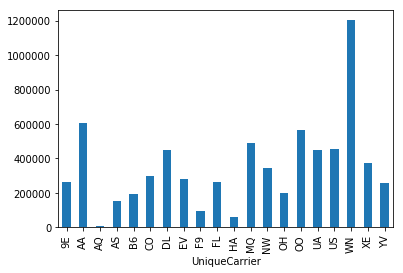

In [13]:
flights_df.groupby('UniqueCarrier').size().plot(kind='bar');

In [20]:
flights_df.groupby(['UniqueCarrier','FlightNum'])\
  .agg({'Distance': [np.mean, np.sum, 'count'], 'Cancelled': np.sum})\
  .sort_values(('Distance', 'sum'), ascending=False)\
  .iloc[0:3]

Distance                  Cancelled
                                mean        sum count       sum
UniqueCarrier FlightNum                                        
CO            15         4962.000000  1796244.0   362         0
              14         4962.000000  1796244.0   362         0
UA            52         2465.181818  1789722.0   726         8

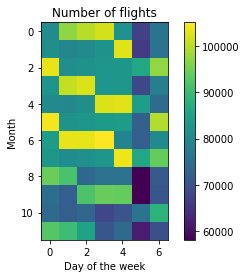

In [30]:
plt.imshow(pd.crosstab(flights_df.Month, flights_df.DayOfWeek))
plt.title("Number of flights")
plt.xlabel("Day of the week")
plt.ylabel("Month")
plt.colorbar();

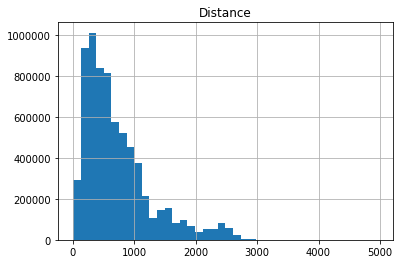

In [38]:
flights_df.hist('Distance', bins=40);

In [39]:
flights_df['Date'] = pd.to_datetime(flights_df.rename(
    columns={'DayofMonth': 'Day'})[['Year', 'Month', 'Day']])

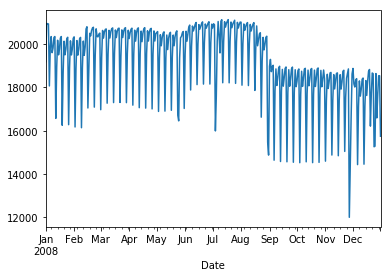

In [53]:
num_flights_by_date = flights_df.groupby('Date').size()
num_flights_by_date.plot();

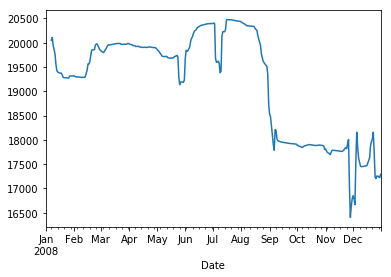

In [47]:
num_flights_by_date.rolling(window=7).mean().plot();

In [57]:
flights_df['DepHour'] = flights_df['DepTime'] // 100
flights_df['DepHour'].replace(to_replace=24, value=0, inplace=True)

In [58]:
flights_df['DepHour'].describe()

count    6873482.0
mean           NaN
std            0.0
min            0.0
25%            9.0
50%           13.0
75%           17.0
max           23.0
Name: DepHour, dtype: float64

# Now it's your turn. Answer the questions below.

### 1. How many unique carriers are there in our dataset?
The are 20

### 2. We have both cancelled and completed flights in the dataset. Check if there are more completed or cancelled flights. What is the difference? 

In [60]:
# Check if there are more completed or cancelled flights
flights_df['Cancelled'].value_counts()

0    6872294
1     137434
Name: Cancelled, dtype: int64

In [63]:
# What is the difference?
print("Completed overweights cancelled by", 6872294 - 137434, "flights")

Completed overweights cancelled by 6734860 flights


### 3. Find a flight with the longest departure delay and a flight with the longest arrival delay. Do they have the same destination airport, and if yes, what is its code?

In [80]:
flights_df.loc[flights_df["DepDelay"].idxmax()]["Dest"]

'MSP'

In [81]:
flights_df.loc[flights_df["ArrDelay"].idxmax()]["Dest"]

'MSP'

yes, MSP

### 4. Find the carrier that has the greatest number of cancelled flights.

In [100]:
flights_df.groupby("UniqueCarrier")["Cancelled"].sum().sort_values()

UniqueCarrier
AQ       42.0
F9      303.0
HA      570.0
AS     2139.0
FL     2236.0
NW     2906.0
B6     3205.0
CO     3702.0
EV     5026.0
OH     6462.0
US     6582.0
DL     6813.0
9E     7100.0
YV     9219.0
XE     9992.0
UA    10541.0
WN    12389.0
OO    12436.0
AA    17440.0
MQ    18331.0
Name: Cancelled, dtype: float64

MQ

### 5. Let's examine departure time and consider distribution by hour (column DepHour that we've created earlier). Which hour has the highest percentage of flights?

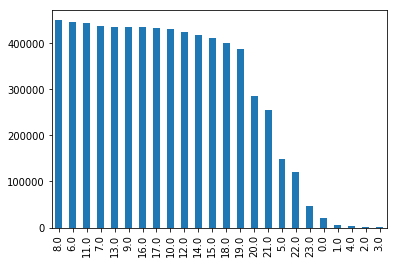

In [120]:
flights_df["DepHour"].value_counts().plot(kind="bar")

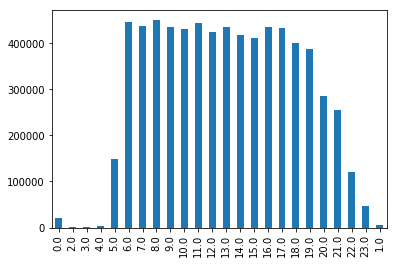

In [107]:
flights_df["DepHour"].value_counts(sort=False).plot(kind="bar")